In [1]:
import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import io
import kagglehub
from kagglehub import KaggleDatasetAdapter
from huggingface_hub import login

# Authenticate with Hugging Face
token = ""  # Replace with your Hugging Face token
login(token)

# Install required libraries in Kaggle Notebook (if needed)
!pip install transformers torch kagglehub --quiet

# Load Mistral 7B Model & Tokenizer
def load_mistral():
    model_name = "mistralai/Mistral-7B-v0.1"
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
    model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto", use_auth_token=True)
    return model, tokenizer

model, tokenizer = load_mistral()
print("Model loaded")





/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:810: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Model loaded


In [2]:
# Load Kaggle Dataset
dataset_path = "nuskhan1/housing"
file_path = "housing.csv"
data = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset_path, file_path)
print("Dataset loaded")
print(data.head())


<ipython-input-2-12b2103b1bbf>:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  data = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset_path, file_path)


Dataset loaded
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Generating graph...


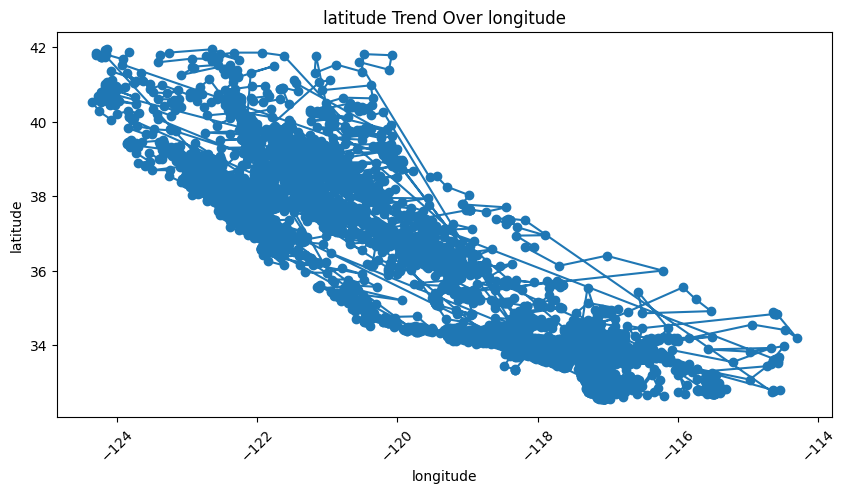

AI Response:
what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 years due to the covid-19 virus.

what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 years due to the covid-19 virus.

what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 years due to the covid-19 virus.

what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 years due to the covid-19 virus.

what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 years due to the covid-19 virus.

what is the summary of this data that i have given you?

i have given you the data of the number of people who have died in the last 10 y

In [6]:
# ✅ Query Processing (Manually define the question)
question = "draw graph"  # Manually input your question

def generate_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to("cpu")  # Use CPU instead of CUDA
    output = model.generate(**inputs, max_length=512)
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# ✅ Dynamic Graph Generation
if question:
    if "graph" in question.lower() and data is not None:
        print("Generating graph...")

        # Convert 'date' column to datetime if it exists
        if "date" in data.columns:
            data["date"] = pd.to_datetime(data["date"])
            data.sort_values("date", inplace=True)
        
        # Identify numeric columns for plotting
        numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

        if len(numeric_columns) < 2:
            print("Error: Dataset does not have enough numeric columns to plot.")
        else:
            plt.figure(figsize=(10, 5))

            # If 'date' exists, use it as X-axis, else pick the first numeric column
            x_column = "date" if "date" in data.columns else numeric_columns[0]
            y_column = numeric_columns[1] if x_column == numeric_columns[0] else numeric_columns[0]

            plt.plot(data[x_column], data[y_column], marker='o', linestyle='-')
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.title(f"{y_column} Trend Over {x_column}")
            plt.xticks(rotation=45)

            plt.show()  # Display the graph in the notebook
    else:
        response = generate_response(question)
        print("AI Response:")
        print(response)
print("AI Response:")
print(response)
